---
1.b
---
b) Considerando a infração mais recorrente, construa um mapa de calor que represente
a distribuição espacial
dos dados. Dica: Use o pacote leaflet.extras.

In [2]:
library(data.table)

# para ler e processar arquvos grandes data.table é otimo

outubroReduzido <- fread("source/Dados_infracoes_outubro_reduzido_2019.csv", encoding = "Latin-1")
dim(outubroReduzido)

[1] 63415    11

VAMOS remover linhas com tipo_infracao == ""

In [3]:
outubroReduzido2 <- outubroReduzido[-which(outubroReduzido$tipo_infracao=="")]

latitude conhecida

In [4]:
outubroReduzido3 <- outubroReduzido2[-which(outubroReduzido2$auinf_local_latitude %in% c(0,"" ) ) ,]
dim(outubroReduzido3)
# 9467

[1] 9467   11

# qual a infracao mais recorrente?

In [5]:
infraFreq <- outubroReduzido3[, .(count = .N), by = list(tipo_infracao) ][order(-count)]
head(infraFreq)
maisfreq<-infraFreq[1]$tipo_infracao
maisfreq
# 6769-0

tipo_infracao,count
<chr>,<int>
6769-0,1362
7633-2,769
7633-1,759
5185-1,636
5843-4,514
6599-2,406


[1] "6769-0"

# no meu sistema tenho que trocar , por .

In [6]:
{
  outubroReduzido3$auinf_local_latitude<-gsub("," , ".",outubroReduzido3$auinf_local_latitude)
  outubroReduzido3$auinf_local_latitude<-as.numeric(outubroReduzido3$auinf_local_latitude)

  outubroReduzido3$auinf_local_longitude<-gsub(",",".",outubroReduzido3$auinf_local_longitude)
  outubroReduzido3$auinf_local_longitude<-as.numeric(outubroReduzido3$auinf_local_longitude)
}

# reduzir o data.table com apenas uma infracao

In [7]:
outubroReduzido1.2 <- outubroReduzido3[which(outubroReduzido3$tipo_infracao %in% maisfreq)]
dim(outubroReduzido1.2)

[1] 1362   11

# instalar se falta:

In [8]:
if (system.file(package = "leaflet") == '') {
  install.packages("leaflet")
}
if (system.file(package = "leaflet.extras") == '') {
  install.packages("leaflet.extras")
}
if (system.file(package = "htmlwidgets") == '') {
  install.packages("htmlwidgets")
}
if (system.file(package = "IRdisplay") == '') {
  install.packages("IRdisplay")
}

library(leaflet.extras)
library(htmlwidgets)
library(IRdisplay)

#install.packages("webshot")
if (system.file(package = "webshot") == '') {
              install.packages("webshot")
              webshot::install_phantomjs()
}
library(webshot)

Loading required package: leaflet



[1] "tipo_infracao"         "descricao"             "tipo_infrator"        
 [4] "tipo_veiculo"          "cometimento"           "hora_cometimento"     
 [7] "auinf_local_rodovia"   "auinf_local_km"        "auinf_local_latitude" 
[10] "auinf_local_longitude" "grav_tipo"

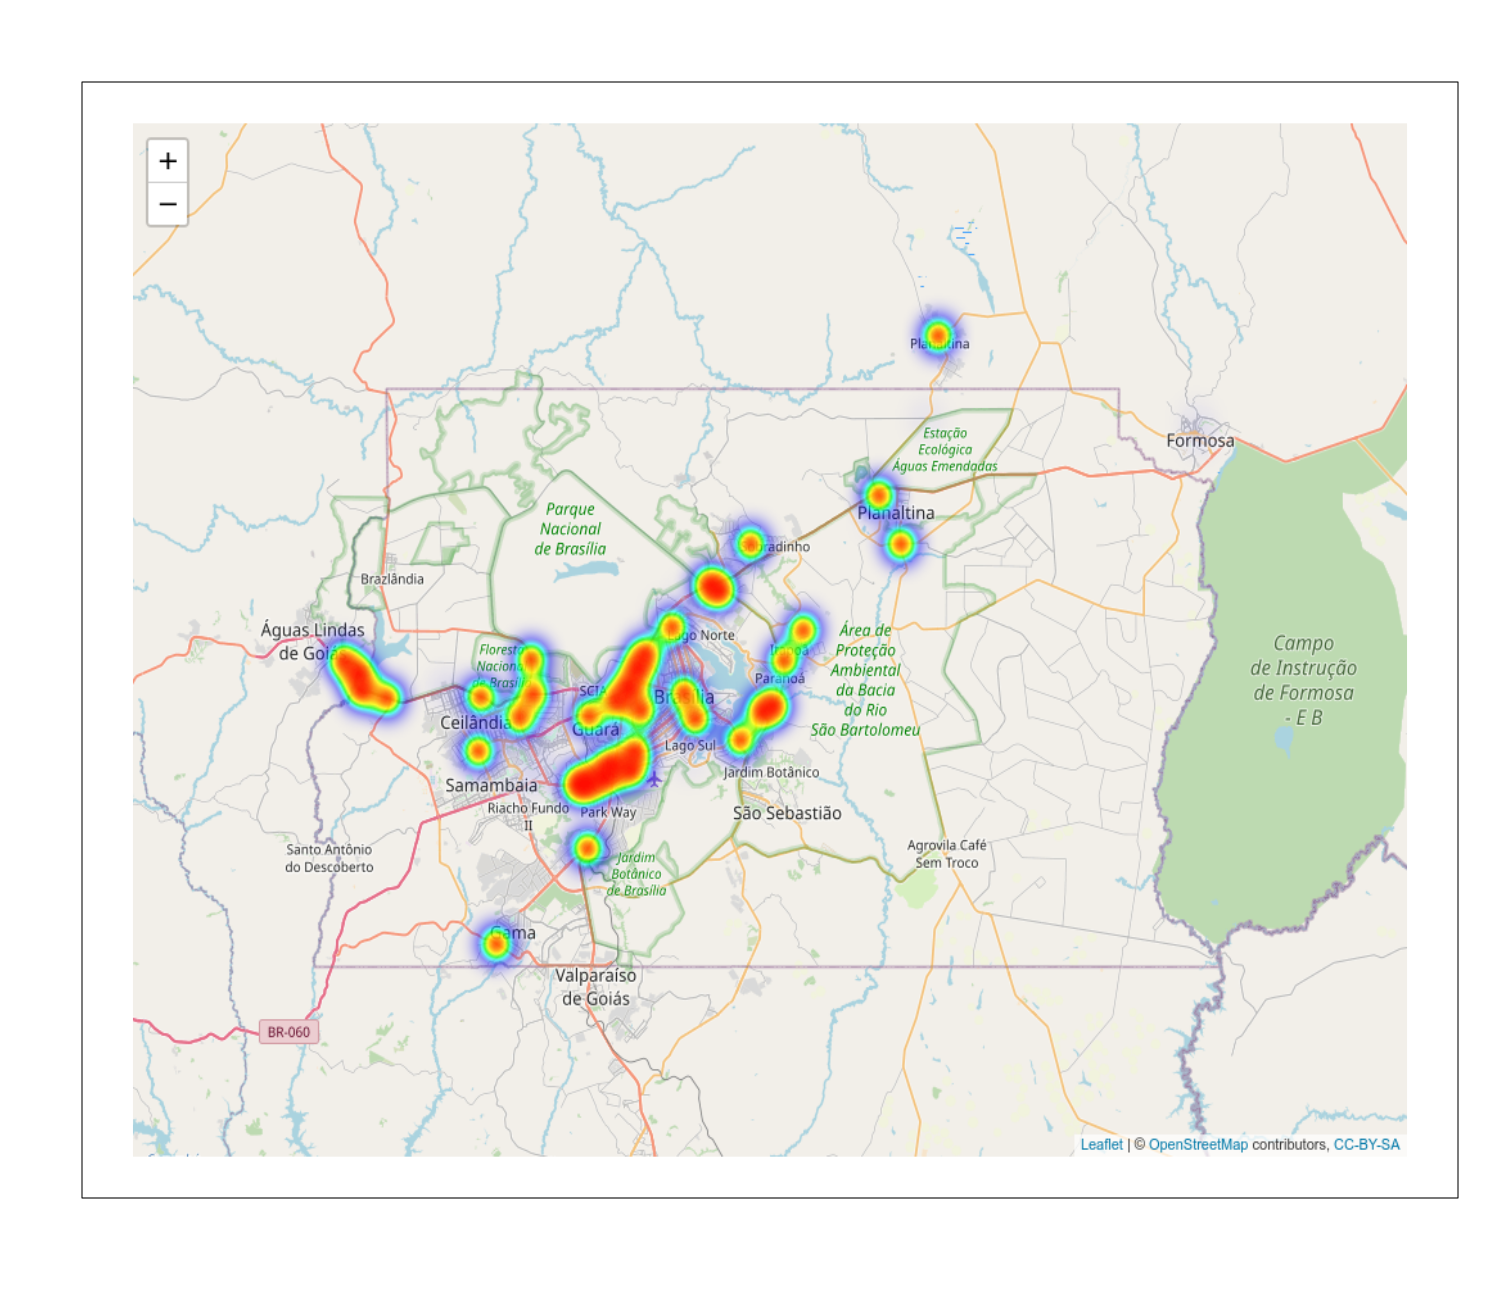

In [9]:
colnames(outubroReduzido1.2)

m1b = leaflet(data = outubroReduzido1.2) %>% addTiles() %>%
  addHeatmap(
    lng = ~auinf_local_longitude
    , lat = ~auinf_local_latitude
    # , intensity = ~
    ,blur = 20, max = 0.05, radius = 15
  )

saveWidget(m1b, 'ht1b.html', selfcontained = TRUE)
#display_html('<iframe src="ht1b.html" width="500" height ="300"></iframe>')

webshot("ht1b.html", file = "Rplot1b.png")
library(png)
img <- readPNG("Rplot1b.png")
options(repr.plot.width = 15, repr.plot.height = 13, repr.plot.res = 100)
plot(NA, xlim = c(0, 7), ylim = c(0, 7), type = "n", xaxt = "n", yaxt = "n", xlab = "", ylab = "")
rasterImage(img, 0, 0, 7, 7)